In [39]:
import pandas as pd
import numpy as np
import wrangle

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing 
# import MinMaxScaler, RobustScaler, StandardScaler, InverseTransform

from scipy import stats

## Regression Exercises

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [2]:
# acquire and prep my data using the functions from my wrangle.py
df = wrangle.prep_telco(wrangle.get_telco_data())

In [3]:
df.head()

,index,customer_id,monthly_charges,tenure,total_charges
0,5348,0040-HALCW,20.4,54,1090.60
1,5349,0042-RLHYP,19.7,69,1396.90
2,5350,0057-QBUQH,25.1,43,1070.15
3,5351,0064-SUDOG,20.3,12,224.50
4,5352,0071-NDAFP,25.5,25,630.60


In [27]:
df.dtypes

index                int64
customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [5]:
# split our data
train, validate, test = wrangle.telco_split(df)

train---> (943, 5)
validate---> (405, 5)
test---> (337, 5)


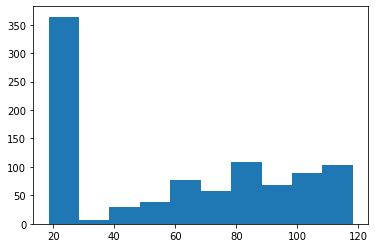

In [12]:
plt.hist(train['monthly_charges'])
plt.show()

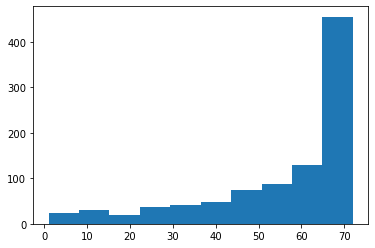

In [13]:
plt.hist(train['tenure'])
plt.show()

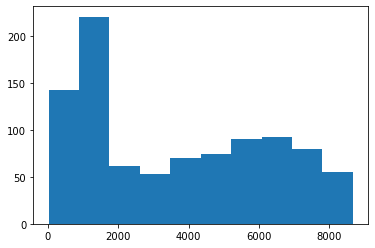

In [14]:
plt.hist(train['total_charges'])
plt.show()

Text(0.5, 1.0, 'Distribution of Total Charges')

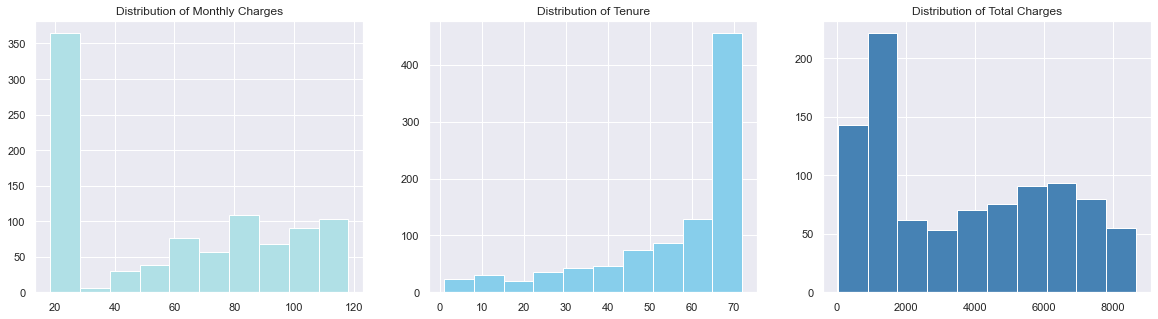

In [24]:
plt.subplots(1, 3, figsize=(20,5), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(1,3,1)
plt.hist(data=train, x='monthly_charges', color="powderblue")
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(1,3,2)
plt.hist(data=train, x='tenure', color="skyblue")
plt.title('Distribution of Tenure')

# Total Charges
plt.subplot(1,3,3)
plt.hist(data=train, x='total_charges', color="steelblue")
plt.title('Distribution of Total Charges')

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [ ]:
## bring in my scaler
scaler = MinMaxScaler()

In [25]:
# fit it
scaler.fit(train[['total_charges']])
scaler.fit(train[['tenure']])
scaler.fit(train[['monthly_charges']])

MinMaxScaler()

In [28]:
# use it
train['total_charges_minmax'] = scaler.transform(train[['total_charges']])
train['tenure_minmax'] = scaler.transform(train[['tenure']])
train['monthly_minmax'] = scaler.transform(train[['monthly_charges']])

In [30]:
train.head().T

,360,1165,1091,574,1421
index,5712,6519,6444,5927,6779
customer_id,5696-EXCYS,1951-IEYXM,0440-EKDCF,8966-SNIZF,6034-ZRYCV
monthly_charges,19.45,90.6,60.15,19.45,54.2
tenure,17,72,62,70,72
total_charges,369.05,6441.85,3753.2,1303.5,3937.45
total_charges_minmax,3.51353,64.3632,37.4228,12.8768,39.269
tenure_minmax,-0.0140281,0.537074,0.436874,0.517034,0.537074
monthly_minmax,0.010521,0.723447,0.418337,0.010521,0.358717


Text(0.5, 1.0, 'Scaled')

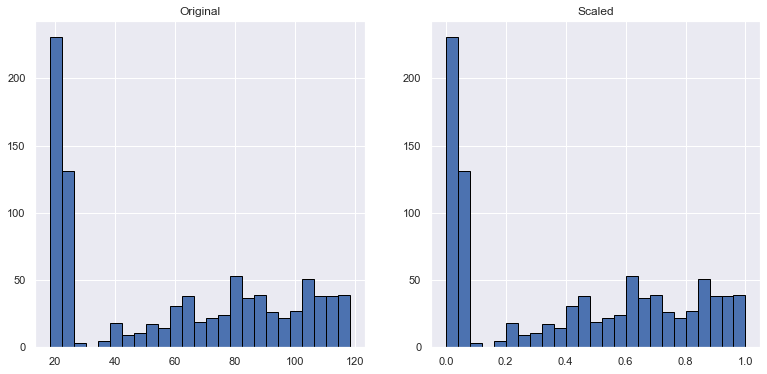

In [31]:
# plot side by side: Monthly Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_minmax, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

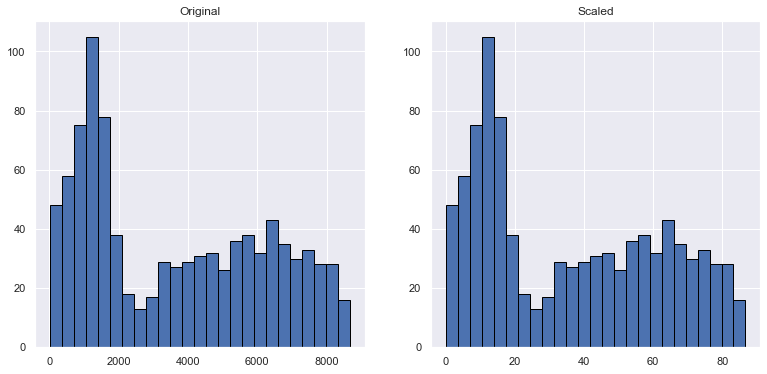

In [32]:
# plot side by side: Total Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.total_charges_minmax, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

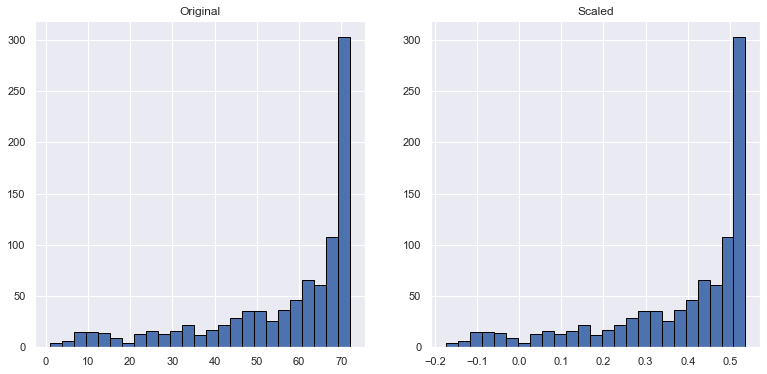

In [33]:
# plot side by side: Tenure
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.tenure_minmax, bins=25, ec='black')
plt.title('Scaled')

In [34]:
train.head()

,index,customer_id,monthly_charges,tenure,total_charges,total_charges_minmax,tenure_minmax,monthly_minmax
360,5712,5696-EXCYS,19.45,17,369.05,3.513527,-0.014028,0.010521
1165,6519,1951-IEYXM,90.60,72,6441.85,64.363226,0.537074,0.723447
1091,6444,0440-EKDCF,60.15,62,3753.20,37.422846,0.436874,0.418337
574,5927,8966-SNIZF,19.45,70,1303.50,12.876754,0.517034,0.010521
1421,6779,6034-ZRYCV,54.20,72,3937.45,39.269038,0.537074,0.358717


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [54]:
# reverts back to original column
scaler.inverse_transform(train[['monthly_minmax']])
scaler.inverse_transform(train[['total_charges_minmax']])
(scaler.inverse_transform(train[['tenure_minmax']]))[:5] # only show first 5

array([[17.],
       [72.],
       [62.],
       [70.],
       [72.]])

In [50]:
train.head()

,index,customer_id,monthly_charges,tenure,total_charges,total_charges_minmax,tenure_minmax,monthly_minmax
360,5712,5696-EXCYS,19.45,17,369.05,3.513527,-0.014028,0.010521
1165,6519,1951-IEYXM,90.60,72,6441.85,64.363226,0.537074,0.723447
1091,6444,0440-EKDCF,60.15,62,3753.20,37.422846,0.436874,0.418337
574,5927,8966-SNIZF,19.45,70,1303.50,12.876754,0.517034,0.010521
1421,6779,6034-ZRYCV,54.20,72,3937.45,39.269038,0.537074,0.358717


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [57]:
train = train.set_index("customer_id")
validate = validate.set_index("customer_id")
test = test.set_index("customer_id")

In [62]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [66]:
train['monthly_charges_qt'] = qt.fit_transform(train[['monthly_charges']])
train['total_charges_qt'] = qt.fit_transform(train[['total_charges']])
train['tenure_qt'] = qt.fit_transform(train[['tenure']])

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [77]:
train.head()
fit_transform(train.columns)

,index,monthly_charges,tenure,total_charges,total_charges_minmax,tenure_minmax,monthly_minmax,monthly_charges_qt,total_charges_qt,tenure_qt
customer_id,,,,,,,,,,
5696-EXCYS,5712,19.45,17,369.05,3.513527,-0.014028,0.010521,0.032909,0.050955,0.060510
1951-IEYXM,6519,90.60,72,6441.85,64.363226,0.537074,0.723447,0.749469,0.802548,1.000000
0440-EKDCF,6444,60.15,62,3753.20,37.422846,0.436874,0.418337,0.486200,0.528662,0.458599
8966-SNIZF,5927,19.45,70,1303.50,12.876754,0.517034,0.010521,0.032909,0.267516,0.702760
6034-ZRYCV,6779,54.20,72,3937.45,39.269038,0.537074,0.358717,0.449575,0.546709,1.000000


Text(0.5, 1.0, 'Scaled')

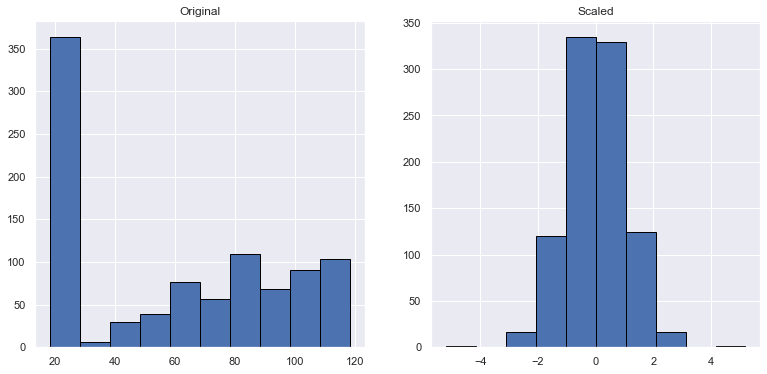

In [70]:
# plot side by side: Monthly Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_charges_qt, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

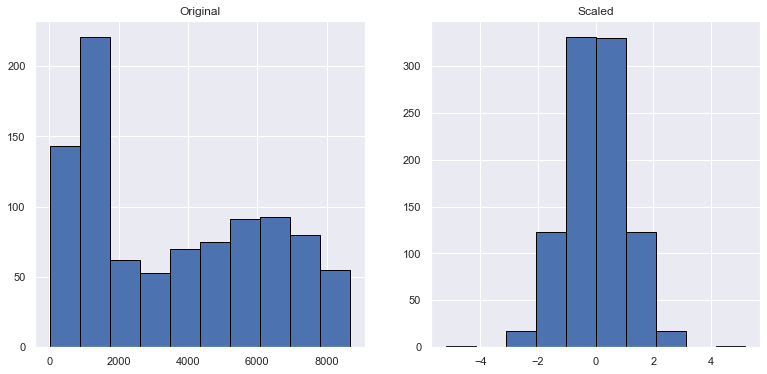

In [71]:
# plot side by side: Total Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.total_charges_qt, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

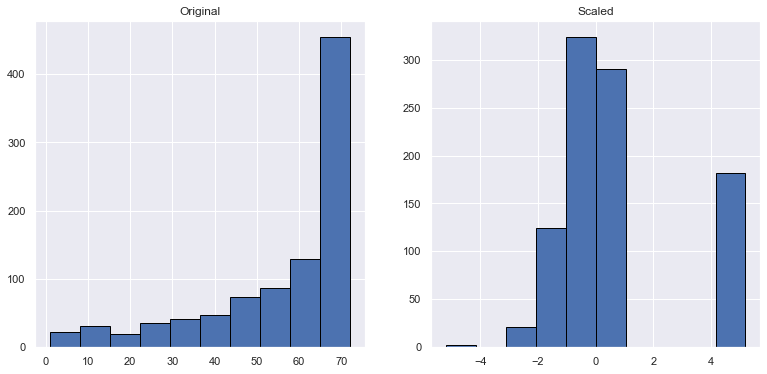

In [72]:
# plot side by side: Tenure
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.tenure_qt, ec='black')
plt.title('Scaled')

In [73]:
# 4. Use the QuantileTransformer, but omit the output_distribution argument. 
# Visualize your results. What do you notice?
qt = sklearn.preprocessing.QuantileTransformer()

train['monthly_charges_qt'] = qt.fit_transform(train[['monthly_charges']])
train['total_charges_qt'] = qt.fit_transform(train[['total_charges']])
train['tenure_qt'] = qt.fit_transform(train[['tenure']])

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Text(0.5, 1.0, 'Scaled')

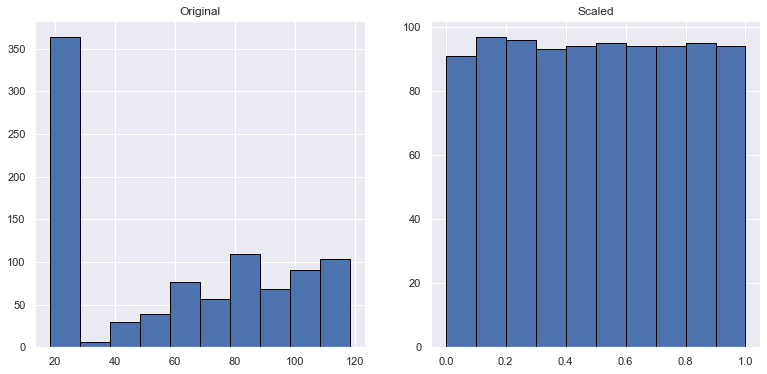

In [74]:
# plot side by side: Monthly Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_charges_qt, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

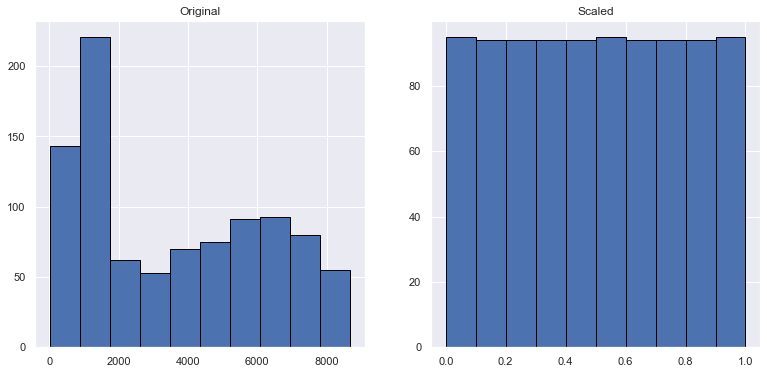

In [75]:
# plot side by side: Total Charges
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.total_charges_qt, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

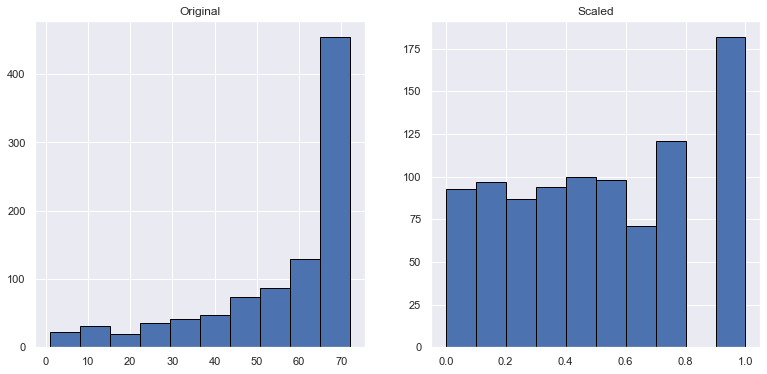

In [76]:
# plot side by side: Tenure
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.tenure_qt, ec='black')
plt.title('Scaled')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!